In [1]:
import numpy as np
import pandas as pd
import snap
import matplotlib.pyplot as plt
import powerlaw as pl

In [2]:
edges = pd.read_csv("da/after_GC/Edges.csv")
nodes = pd.read_csv("da/after_GC/Nodes.csv")

In [3]:
# Create an empty Vector - SNAP data structure
src = snap.TIntV() 
trg = snap.TIntV()
n = snap.TIntV()

# Add elements
[src.Add(element) for element in edges['Source'].tolist()]
[trg.Add(element) for element in edges['Target'].tolist()]
[n.Add(element) for element in nodes['Id'].tolist()]

# Print vector size
print ('Source Size -->',src.Len())
print ('Target Size -->',trg.Len())
print ('Sequence Length -->',n.Len())

Source Size --> 6423647
Target Size --> 6423647
Sequence Length --> 109293


# Graph Creation

In [4]:
# Create a Directed Graph
G1 = snap.TNGraph.New()

# Add Nodes before 
for i in range(0, n.Len()):
    G1.AddNode(n[i])

# adding edges
for i in range(0, src.Len()):
    G1.AddEdge(src[i],trg[i])

# Set node labels
NIdName = snap.TIntStrH() 
for node in n:
    NIdName[node] = str(node)

# Directed network
N1 = snap.TNEANet.New()
print("Directed Graph creation successfuly!")

Directed Graph creation successfuly!


# The innermost k-shell

In [6]:
K=0
while True:
    K=K+1
    KCore = snap.GetKCore(G1, K)
    if KCore.Empty():
        print ('No Core exists for K=%d' % K)
        break
    else:
        print ('Core exists for K=%d' % K)
        pass

Core exists for K=1
Core exists for K=2
Core exists for K=3
Core exists for K=4
Core exists for K=5
Core exists for K=6
Core exists for K=7
Core exists for K=8
Core exists for K=9
Core exists for K=10
Core exists for K=11
Core exists for K=12
Core exists for K=13
Core exists for K=14
Core exists for K=15
Core exists for K=16
Core exists for K=17
Core exists for K=18
Core exists for K=19
Core exists for K=20
Core exists for K=21
Core exists for K=22
Core exists for K=23
Core exists for K=24
Core exists for K=25
Core exists for K=26
Core exists for K=27
Core exists for K=28
Core exists for K=29
Core exists for K=30
Core exists for K=31
Core exists for K=32
Core exists for K=33
Core exists for K=34
Core exists for K=35
Core exists for K=36
Core exists for K=37
Core exists for K=38
Core exists for K=39
Core exists for K=40
Core exists for K=41
Core exists for K=42
Core exists for K=43
Core exists for K=44
Core exists for K=45
Core exists for K=46
Core exists for K=47
Core exists for K=48
C

In [10]:
k_list = []
val_list = []
# Calcualte the number of nodes in every core
CoreIDSzV = snap.TIntPrV()
kValue = snap.GetKCoreNodes(G1, CoreIDSzV)
for item in CoreIDSzV:
    print ("k-core: %d nodes: %d" % (item.GetVal1(), item.GetVal2()))
    k_list.append(item.GetVal1())
    val_list.append(item.GetVal2())

k-core: 0 nodes: 109293
k-core: 1 nodes: 109289
k-core: 2 nodes: 109287
k-core: 3 nodes: 109279
k-core: 4 nodes: 109273
k-core: 5 nodes: 109263
k-core: 6 nodes: 109250
k-core: 7 nodes: 109241
k-core: 8 nodes: 109213
k-core: 9 nodes: 109195
k-core: 10 nodes: 109174
k-core: 11 nodes: 109136
k-core: 12 nodes: 109076
k-core: 13 nodes: 108996
k-core: 14 nodes: 108910
k-core: 15 nodes: 108791
k-core: 16 nodes: 108679
k-core: 17 nodes: 108472
k-core: 18 nodes: 108239
k-core: 19 nodes: 107918
k-core: 20 nodes: 107531
k-core: 21 nodes: 107020
k-core: 22 nodes: 106453
k-core: 23 nodes: 105794
k-core: 24 nodes: 105000
k-core: 25 nodes: 104099
k-core: 26 nodes: 103007
k-core: 27 nodes: 101838
k-core: 28 nodes: 100519
k-core: 29 nodes: 98940
k-core: 30 nodes: 97290
k-core: 31 nodes: 95438
k-core: 32 nodes: 93449
k-core: 33 nodes: 91351
k-core: 34 nodes: 89144
k-core: 35 nodes: 86781
k-core: 36 nodes: 84451
k-core: 37 nodes: 81786
k-core: 38 nodes: 79171
k-core: 39 nodes: 76451
k-core: 40 nodes: 739

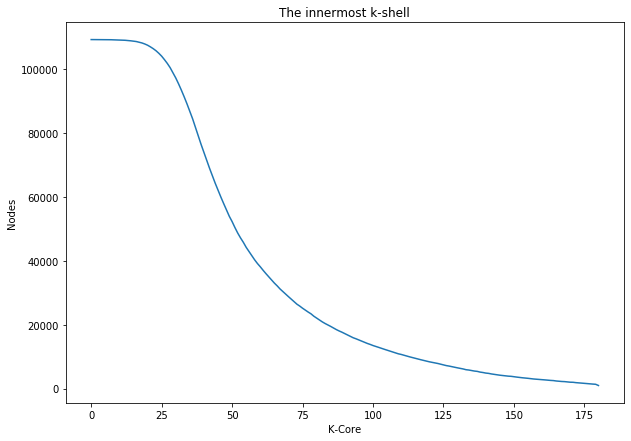

In [17]:
# Plot innermost K-shell Distribution
plt.rcParams['figure.figsize'] = [10, 7] # Size of plt
plt.xlabel("K-Core")
plt.ylabel("Nodes")
plt.title("The innermost k-shell")
plt.plot(k_list,val_list)
plt.savefigigfigvefig("k_shell_dist.png")
plt.show()

# Triads and clustering coefficient

In [14]:
# Count triads
Triads = snap.GetTriads(G1)
print ("triads = ", Triads)

# Calculate clustering coefficient
CC = snap.GetClustCf(G1)
print ("clustering coefficient = ", CC)

triads =  25542734
clustering coefficient =  0.12594780179802378


# The average path length, diameter and effective diameter

In [15]:
# DIRECTED
result = snap.GetBfsEffDiamAll(G1, 1000, True)
print ("Diameter = ", result[2])
print ("approx. Effective Diameter = ", result[0])
print ("approx. The average path length = ", result[3])

Diameter =  7
approx. Effective Diameter =  3.19081045135703
approx. The average path length =  2.958673874204192


In [16]:
# UN-DIRECTED
result = snap.GetBfsEffDiamAll(G1, 1000, False)
print ("Diameter = ", result[2])
print ("approx. Effective Diameter = ", result[0])
print ("approx. The average path length = ", result[3])

Diameter =  6
approx. Effective Diameter =  2.856707656632267
approx. The average path length =  2.632829351535836


# In-Degree Distribution

In [ ]:
# Create a Directed Graph
G2 = snap.TNGraph.New()

# Add Nodes before 
for i in range(0, n.Len()):
    G2.AddNode(n[i])

# adding edges
for i in range(0, src.Len()):
    G2.AddEdge(src[i],trg[i])

# Set node labels
NIdName = snap.TIntStrH() 
for node in n:
    NIdName[node] = str(node)

# Directed network
N1 = snap.TNEANet.New()
print("Undirected Graph creation successfuly!")

In [17]:
# Get maximum Weakly Connected Components
MxWcc = snap.GetMxWcc(G2)
print ("max wcc nodes: %d\nedges: %d" % \
    (MxWcc.GetNodes(), MxWcc.GetEdges()))

<snap.TIntPrV; proxy of <Swig Object of type 'TVec< TPair< TInt,TInt >,int > *' at 0x000000CCAD757810> >

In [5]:
InDegV = snap.TIntPrV()
snap.GetNodeInDegV(G1, InDegV)

numItemstoList=20;i=0;
for item in InDegV:
    print( "node ID %d: in-degree %d" % (item.GetVal1(), item.GetVal2()))
    i=i+1
    if i==numItemstoList:
        break # comment to output all nodes

node ID 1: in-degree 9
node ID 2: in-degree 60
node ID 4: in-degree 44
node ID 26: in-degree 27
node ID 57: in-degree 98
node ID 59: in-degree 35
node ID 65: in-degree 133
node ID 76: in-degree 18
node ID 84: in-degree 20
node ID 90: in-degree 53
node ID 96: in-degree 17
node ID 99: in-degree 24
node ID 112: in-degree 8
node ID 115: in-degree 29
node ID 116: in-degree 31
node ID 117: in-degree 26
node ID 118: in-degree 18
node ID 129: in-degree 18
node ID 130: in-degree 343
node ID 156: in-degree 12
